In [1]:
# use of aggregation for outlier detection

#imports
# supress warnings for clean output
import warnings

warnings.filterwarnings("ignore")

from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

from combo.models.detector_comb import SimpleDetectorAggregator

contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

# Generate sample data
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=2,
                  contamination=contamination,
                  random_state=42)



On Training Data:
Aggregation by Averaging ROC:0.9994, precision @ rank n:0.95

On Test Data:
Aggregation by Averaging ROC:1.0, precision @ rank n:1.0


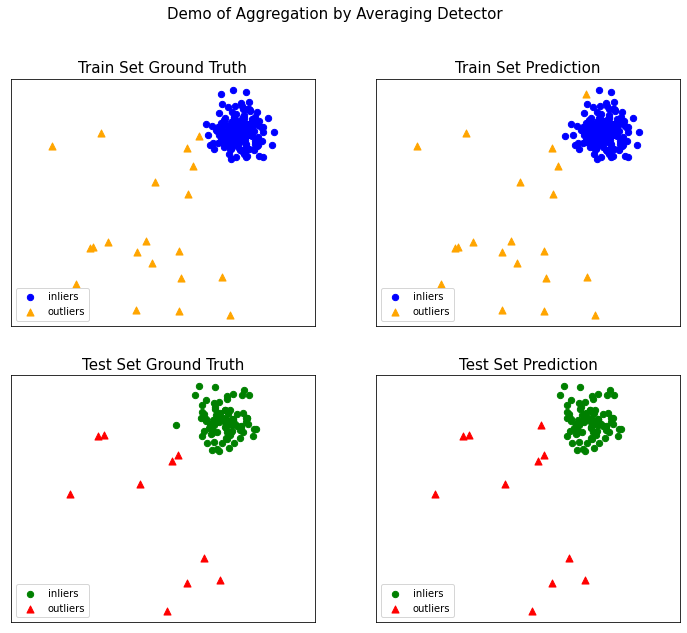

In [2]:
#create detectors
detectors = [KNN(), LOF(), OCSVM()]

#create aggregator, name it, and train it
clf = SimpleDetectorAggregator(base_estimators=detectors)
clf_name = 'Aggregation by Averaging'
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=True)